# Pharmaceutical Companies Racing for Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Pharmaceutical Companie Vanccine 
symbols = ['MRNA']
start = '2018-01-01'
end = '2019-08-29'

In [3]:
df1 = pd.DataFrame()
for s in symbols:
    df1[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df1.index[-1] - df1.index[0]).days
days

264

In [7]:
df1.head()

MRNA
Date                 
2018-12-07  18.600000
2018-12-10  18.799999
2018-12-11  18.010000
2018-12-12  18.680000
2018-12-13  18.760000

In [8]:
# Next Ticker 
symbols = ['PFE']
start = '2018-01-01'
end = '2019-08-29'

In [9]:
df2 = pd.DataFrame()
for s in symbols:
    df2[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [11]:
number_of_years = delta.years

In [12]:
days = (df2.index[-1] - df2.index[0]).days
days

603

In [13]:
df2.head()

PFE
Date                 
2018-01-02  34.573055
2018-01-03  34.829224
2018-01-04  34.905125
2018-01-05  34.971539
2018-01-08  34.582542

In [14]:
# Next Ticker 
symbols = ['NVAX']
start = '2018-01-01'
end = '2019-08-29'

In [15]:
df3 = pd.DataFrame()
for s in symbols:
    df3[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [16]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [17]:
number_of_years = delta.years

In [18]:
days = (df3.index[-1] - df3.index[0]).days
days

603

In [19]:
df3.head()

NVAX
Date                 
2018-01-02  26.000000
2018-01-03  27.000000
2018-01-04  26.400000
2018-01-05  25.799999
2018-01-08  27.000000

In [20]:
# Next Ticker 
symbols = ['JNJ']
start = '2018-01-01'
end = '2019-08-29'

In [21]:
df4 = pd.DataFrame()
for s in symbols:
    df4[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [22]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [23]:
number_of_years = delta.years

In [24]:
days = (df4.index[-1] - df4.index[0]).days
days

603

In [25]:
df4.head()

JNJ
Date                  
2018-01-02  139.229996
2018-01-03  140.559998
2018-01-04  140.550003
2018-01-05  141.710007
2018-01-08  141.889999

In [26]:
stocks = pd.concat([df1,df2,df3,df4],axis=1)
stocks.columns = ['XLB','XLE','XLK','XLF'] 

In [27]:
stocks.head()

XLB        XLE        XLK         XLF
Date                                             
2018-01-02  NaN  34.573055  26.000000  139.229996
2018-01-03  NaN  34.829224  27.000000  140.559998
2018-01-04  NaN  34.905125  26.400000  140.550003
2018-01-05  NaN  34.971539  25.799999  141.710007
2018-01-08  NaN  34.582542  27.000000  141.889999

In [28]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

XLB   -0.000396
XLE   -0.000010
XLK   -0.000787
XLF   -0.000112
dtype: float64

In [29]:
stocks.pct_change(1).corr()

XLB       XLE       XLK       XLF
XLB  1.000000  0.316747  0.018576  0.172139
XLE  0.316747  1.000000  0.094680  0.527143
XLK  0.018576  0.094680  1.000000  0.021541
XLF  0.172139  0.527143  0.021541  1.000000

# Simulating Thousands of Possible Allocations

In [30]:
stocks.head()

XLB        XLE        XLK         XLF
Date                                             
2018-01-02  NaN  34.573055  26.000000  139.229996
2018-01-03  NaN  34.829224  27.000000  140.559998
2018-01-04  NaN  34.905125  26.400000  140.550003
2018-01-05  NaN  34.971539  25.799999  141.710007
2018-01-08  NaN  34.582542  27.000000  141.889999

<AxesSubplot:xlabel='Date'>

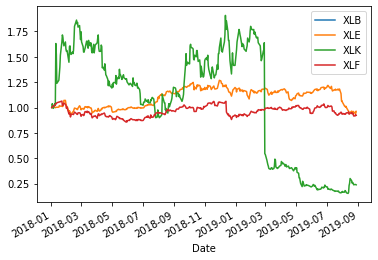

In [31]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [32]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

XLB       XLE       XLK       XLF
Date                                         
2018-01-02  NaN       NaN       NaN       NaN
2018-01-03  NaN  0.007409  0.038462  0.009553
2018-01-04  NaN  0.002179 -0.022222 -0.000071
2018-01-05  NaN  0.001903 -0.022727  0.008253
2018-01-08  NaN -0.011123  0.046512  0.001270

# Log Returns vs Arithmetic Returns

In [33]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

XLB       XLE       XLK       XLF
Date                                         
2018-01-02  NaN       NaN       NaN       NaN
2018-01-03  NaN  0.007382  0.037740  0.009507
2018-01-04  NaN  0.002177 -0.022473 -0.000071
2018-01-05  NaN  0.001901 -0.022990  0.008219
2018-01-08  NaN -0.011186  0.045462  0.001269

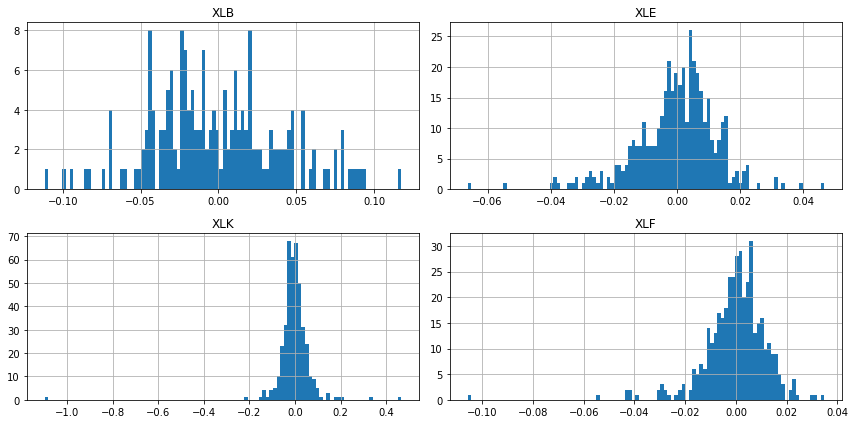

In [34]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [35]:
log_ret.describe().transpose()

count      mean       std       min       25%       50%       75%  \
XLB  181.0 -0.001255  0.041495 -0.111595 -0.030927 -0.005510  0.022372   
XLE  416.0 -0.000091  0.012810 -0.066325 -0.005919  0.001362  0.007368   
XLK  416.0 -0.003438  0.077427 -1.098612 -0.030091 -0.004774  0.021353   
XLF  416.0 -0.000189  0.012534 -0.105781 -0.005593  0.000860  0.006386   

          max  
XLB  0.117590  
XLE  0.046703  
XLK  0.466237  
XLF  0.034834

In [36]:
log_ret.mean() * 252

XLB   -0.316300
XLE   -0.023041
XLK   -0.866448
XLF   -0.047734
dtype: float64

In [37]:
# Compute pairwise covariance of columns
log_ret.cov()

XLB       XLE       XLK       XLF
XLB  0.001722  0.000176  0.000039  0.000093
XLE  0.000176  0.000164  0.000075  0.000084
XLK  0.000039  0.000075  0.005995  0.000016
XLF  0.000093  0.000084  0.000016  0.000157

In [38]:
log_ret.cov()*252 # multiply by days

XLB       XLE       XLK       XLF
XLB  0.433895  0.044347  0.009951  0.023434
XLE  0.044347  0.041355  0.018977  0.021212
XLK  0.009951  0.018977  1.510723  0.003960
XLF  0.023434  0.021212  0.003960  0.039592

In [39]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['XLB', 'XLE', 'XLK', 'XLF'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
-0.1626531105391232


Expected Volatility
0.3174659302928211


Sharpe Ratio
-0.5123482396649518


In [40]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [41]:
sharpe_arr.max()

-0.20521113211694186

In [42]:
sharpe_arr.argmax()

12439

In [43]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [44]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

# Plotting the data

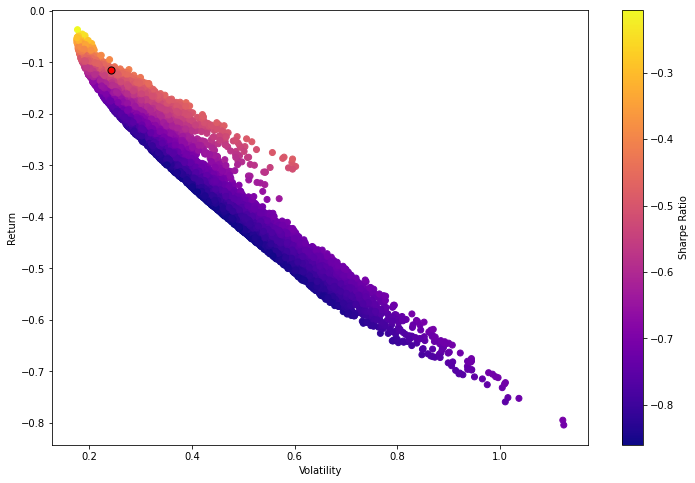

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')